# 모델 평가
모델의 성능을 평가. 평가 결과에 따라 프로세스 다시 반복

## 분류와 회귀의 평가방법
### 분류 평가 방법
1. 정확도 (Accuracy) - balanced data인경우 유용
2. 정밀도 (Precision)
3. 재현률 (Recall)
4. ROC와 AUC

### 회귀 평가 방법
1. MSE (Mean Squareed Error)
2. RMSE (Root Mean Squared Error)
3. $R^2$ (결정 계수)

### sckit-learn 평가 함수
 - sklearn.metrics 모듈

# 분류(Classification) 평가
## 용어
 - 이진 분류(둘 중 하나를 예측)에서 양성과 음성으로 나눔
     - 양성: 예측하려는 대상
     - 음성: 예측대상이 아닌 것
     - ex) 
         - 암환자 분류 - 암환자: 양성, 정상인: 음성
         - 스팸메일 분류 - 양성: 스팸메일, 음성: 스팸메일이 아닌 메일

## 정확도 (Accuracy)
    
$$
정확도(Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
$$

 - 전체 예측한 것중 맞게 예측한 비율로 평가
 - accuracy_score(예측값, 실제답)
 
### Accuracy 평가지표의 문제점
 - 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
     - 예: 양성과 음성의 비율이 1:9인 경우 모두 음성이라고 하면 정확도는 90%

In [6]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator

In [7]:
# 분류 예측 모델(추정기)
# fit할 때 y에 더 많은 값을 가진 고유값으로 예측하는 모델
class MyEstimator(BaseEstimator):
    def fit(self, X, y):
        # y 데이터의 고유값 개수 확인
        cnt=np.unique(y, return_counts=True) # return_counts: 각 고유값들의 개수 반환
        # np.argmax: max값의 index반환
        max_idx=np.argmax(cnt[1])
        # 예측할 값
        self.pred=cnt[0][max_idx]
        
    def predict(self, X):
        return np.full((X.shape[0], 1), fill_value=self.pred)

In [8]:
y=np.array([2,2,3,4,5,6,1,2,7])
cnt=np.unique(y, return_counts=True)
cnt
max_idx=np.argmax(cnt[1])
max_idx
pred=cnt[0][max_idx]
pred

2

## MNIST Data set
 - 손글씨 데이터 셋
 - 사이킷런 제공 image size: 8x8

In [9]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

In [10]:
digits=load_digits()
X=digits.data
y=digits.target

In [11]:
X.shape, y.shape

((1797, 64), (1797,))

In [12]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [13]:
no_0=X[0].reshape(8,8)
no_0

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

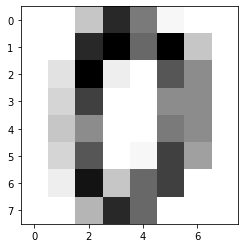

In [14]:
import matplotlib.pyplot as plt
plt.imshow(no_0, cmap='Greys')

## 불균형 데이터셋으로 만들기
 - y를 9와 나머지로 변경
 - Positive(양성): 9
 - Negative(음성): 0 ~ 8

In [15]:
ry = (y == 9)
ry

array([False, False, False, ..., False,  True, False])

In [16]:
np.unique(ry, return_counts=True)

(array([False,  True]), array([1617,  180], dtype=int64))

In [17]:
np.unique(ry, return_counts=True)[1]/ry.size # 9가 아닌 것과 9인 것의 비율

array([0.89983306, 0.10016694])

#### 훈련, 테스트 데이터 셋 분할

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, ry, stratify=ry)
# stratify : 지정한 Data의 비율을 유지

#### 모델 생성 및 학습

In [20]:
my_model=MyEstimator() # 모델 생성
my_model.fit(X_train, y_train) # 학습
pred_train = my_model.predict(X_train)
pred_test = my_model.predict(X_test)

In [21]:
np.unique(pred_train)

array([False])

#### 모델 평가

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.8997772828507795, 0.9)

## 혼동 행렬(confusion_matrix)
 - 이진분류의 평가지료의 기준으로 사용
 - 혼동 행렬을 이용해  다양한 평가지표(정확도, 정밀도, 재현률, F1 점수, AUC 점수) 계산 가능
 - confusion_matrix(실제답, 예측값)

### Recall(재현율)과 Precision(정밀도)
 - 양성 데이터 셋의 예측 성능에 초점을 맞춘 평가 지표
 - Recall/Sensitivity(재현율/민감도): 실제 Positive(양성)인 것 중에 Positive로 예측한 것의 비율
 - Precision(정밀도): Positive(양성)으로 예측한 것 중 실제 Positive인 건수의 비율

specificity: negative(음성) 중 실제 negative를 구하는, 하지만 우리는 positive에 초점을 두기 때문에 사용빈도수는 낮음. 반대로 negative 중 positive가 몇 개인지를 구하는건 auc를 사용할 떄 씀.

### Accuracy(정확도): 전체 중 True 인 것들.

### Dummy 모델 혼동행렬

In [24]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [25]:
confusion_matrix(y_train, pred_train )

array([[1212,    0],
       [ 135,    0]], dtype=int64)

In [26]:
confusion_matrix(y_test, pred_test)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [27]:
accuracy_score(y_test, pred_test)

0.9

### 머신러닝 모델을 이용해 학습

In [28]:
def print_metrics(y, pred, title=None):
    acc=accuracy_score(y, pred)
    recall=recall_score(y, pred)
    precision=precision_score(y, pred)
    f1=f1_score(y, pred)
    if title:
        print(title)
    print(f'정확도:{acc}, 재현율:{recall}, 정밀도:{precision}, f1점수:{f1}')

In [29]:
print(print_metrics(y_test, pred_test, 'dummy-test'))

dummy-test
정확도:0.9, 재현율:0.0, 정밀도:0.0, f1점수:0.0
None


C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred_tree=tree.predict(X_test)
print_metrics(y_test, pred_tree, '결정나무 - test')

결정나무 - test
정확도:0.9488888888888889, 재현율:0.7333333333333333, 정밀도:0.75, f1점수:0.7415730337078651


In [32]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf=rf.predict(X_test)
print_metrics(y_test, pred_rf, 'rf - test')

rf - test
정확도:0.9688888888888889, 재현율:0.7111111111111111, 정밀도:0.9696969696969697, f1점수:0.8205128205128205


C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
from sklearn.preprocessing import Binarizer

binarizer=Binarizer(threshold=0.1)  # positive 로 예측하는 것이 많아진다. => 재현율이 올라가고 정밀도는 낮아진다.
pred_proba_rf=rf.predict_proba(X_test)
pred_rf=binarizer.fit_transform(pred_proba_rf)[:,1]  # 모든 행, 1열
pred_rf
# pred_proba_rf

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0.

In [58]:
print_metrics(y_test, pred_rf)

정확도:0.9244444444444444, 재현율:0.9555555555555556, 정밀도:0.5733333333333334, f1점수:0.7166666666666667


# ROC(곡선)
 - x축: FPR(거짓양성), y축: TPR(참양성)

# AUC(곡선아래 면적)
 - 0 ~ 1 사이 실수의 값으로 나오며 클수록 좋음
 - FPR값은 0에 가까울수록, TPR값은 1에 가까울수록 좋은 모델 (면적이 넓을수록)

### ROC, AUC 확인
 - roc_curve( y값, 예측확률): FPR, TPR, Thresholds(임계값)
 - roc_auc_score( y값, 예측확률): AUC 점수 반환

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [52]:
positive_proba=pred_proba_rf[:,1]
positive_proba

array([0.1, 0.1, 0.3, 0. , 0.5, 0. , 0. , 0. , 0. , 0.1, 0.3, 0.1, 0.1,
       0. , 0.5, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
       0.5, 0.1, 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. ,
       1. , 0. , 0.1, 0. , 0.7, 0. , 0.1, 0.3, 0. , 0. , 0. , 0.1, 0. ,
       0.7, 0. , 0.7, 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.1,
       0. , 0. , 0. , 0. , 0.8, 0.3, 0. , 0. , 0.9, 0. , 0. , 0. , 0. ,
       0. , 0. , 0.1, 0. , 0.9, 0.8, 0. , 0.2, 0.3, 0. , 0.8, 0. , 0. ,
       0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0.1,
       0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
       0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0.9, 0. , 0.8,
       0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0.6,
       0. , 0.3, 0.2, 0. , 0.1, 0.7, 0. , 0.1, 0. , 1. , 0. , 0. , 0. ,
       0.1, 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0.

In [55]:
fprs, tprs, thre = roc_curve(y_test, positive_proba)

In [59]:
thre

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dearm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


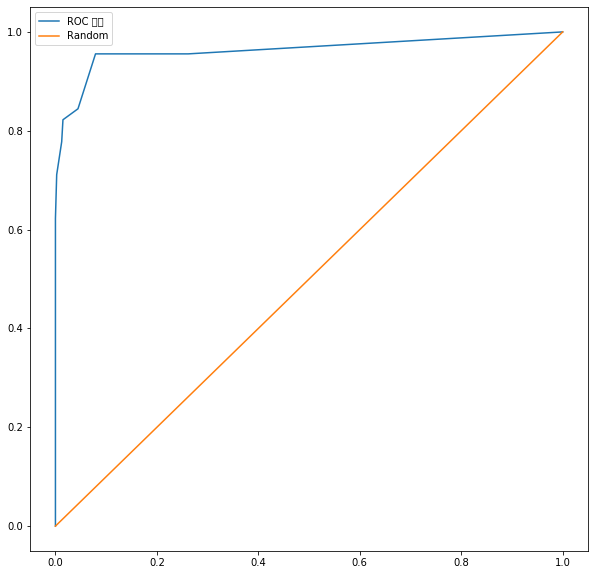

In [65]:
plt.figure(figsize=(10,10), facecolor='W')
plt.plot(fprs, tprs, label='ROC 곡선')
plt.plot([0,1],[0,1],label='Random')
plt.legend()
plt.show()

In [66]:
pred_rf=rf.predict(X_test)
auc=roc_auc_score(y_test, pred_rf)
auc

0.8543209876543212

In [67]:
roc_auc_score(y_test, pred_tree)

0.8530864197530864

In [70]:
pred_dummy=my_model.predict(X_test)
roc_auc_score(y_test, pred_dummy)

0.5

In [71]:
a, b = map(int, input().strip().split(' '))
print(a + b)

 2


ValueError: not enough values to unpack (expected 2, got 1)